<IPython.core.display.Javascript object>


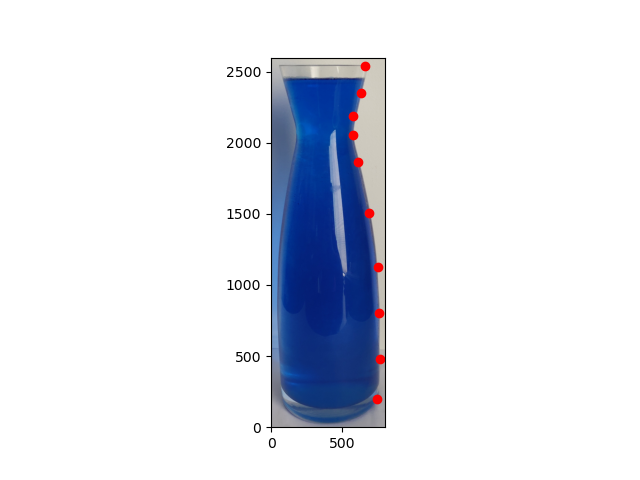

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook

img=mpimg.imread('jarron.png') # lectura da imaxe

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.flipud(img), origin='lower') # representación gráfica da imaxe
coords = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    ax.plot(ix,iy,'ro') # representación gráfica dos puntos vermellos ao facer clic
    
    global coords
    coords.append((ix, iy))

    if len(coords) == 100:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook

In [3]:
coords = [(666.5961850649346, 2496.442640692641),
 (631.4230248917747, 2362.784632034632),
 (589.2152326839823, 2215.0573593073595),
 (568.1113365800861, 2060.2954545454545),
 (603.2844967532465, 1919.6028138528143),
 (645.4922889610389, 1764.8409090909092),
 (666.5961850649346, 1603.0443722943726),
 (715.8386093073591, 1420.1439393939397),
 (743.9771374458874, 1195.0357142857144),
 (751.0117694805194, 955.8582251082253),
 (758.0464015151515, 787.0270562770565),
 (765.0810335497836, 575.9880952380954),
 (758.0464015151515, 386.0530303030304),
 (765.0810335497836, 252.3950216450217)]

In [4]:
# Dimensións imaxen: 800 x 2600 px
# Dimensións do xarrón: 9 x 29 cm  (0.09 x 0.29 m)
jar = 0.29

# Primeiro collemos o punto máis alto e o máis baixo, para elo:
alturas = []        # Creamos unha lista onde introduciremos todas as Y de cada coordenada
mCoords = []        # Creamos unha lista para as coordenadas en metros


# Recorremos a lista 'coords' e engadimos a 'alturas' cada Y
for i in range(len(coords)):
    alturas.append(coords[i][1])
    
    
# Sacamos a altura máxima e mínima coas funcions predefinidas de listas
altMax, altMin = max(alturas), min(alturas)


# Calculamos a diferencia das anteriores e a relación metro/pixel
alturaPix = altMax-altMin    # Aquí temos a altura relativa en píxeles, equivalente aos 29 cm (0,29 m)
pixRel = jar / alturaPix     # Creamos a relación de metros por cada píxel

# Revisión: facemos o mesmo para o ancho, xa que había erros de medida
pixRelW = 0.032 / (571.6286525974028 - 395.76285173160204) 

# Por último, multiplicamos cada elemento de 'coords' pola relación e almacenamolo en mCoords
for item in coords:
    mCoords.append((round(item[0]*pixRelW,12), round(item[1]*pixRel, 12)))

Polinomio:
         6        5        4         3         2
-2772 x + 2991 x - 1201 x + 225.9 x - 21.04 x + 0.9018 x + 0.08486


<IPython.core.display.Javascript object>


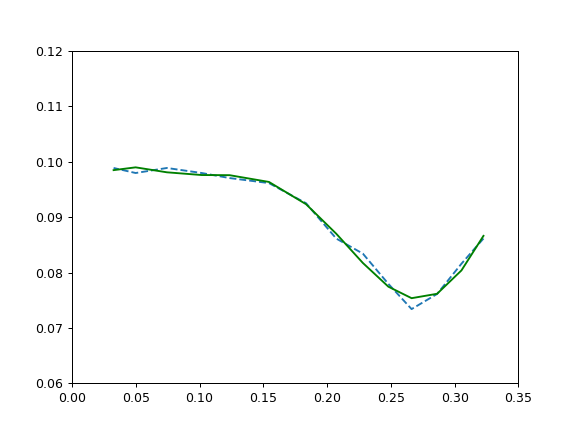

In [8]:
# Definimos dúas listas para separar as coordenadas de 'mCoords' e separlámola cun bucle
x_mCoords = []
y_mCoords = []

for i in range(len(mCoords)):
    x_mCoords.append(mCoords[i][1])
    y_mCoords.append(mCoords[i][0])
    

# Creamos unha aproximación polinómica de grado 6 a partir dos valores de x_mCoords e y_mCoords 
coef = np.polyfit(x_mCoords, y_mCoords, 6)


# Convertimos o array que devolve 'polyfit' nunha función
expr = np.poly1d(coef)
print('Polinomio:\n ', expr)


# Probas para ver a calidade da aproximación
plt.xlim(0, 0.35)
plt.ylim(0.06, 0.12) 
# Puntos reais
plt.plot(x_mCoords,y_mCoords,'--')
# Aproximación
plt.plot(x_mCoords, np.polyval(coef,x_mCoords), 'g')



<IPython.core.display.Javascript object>


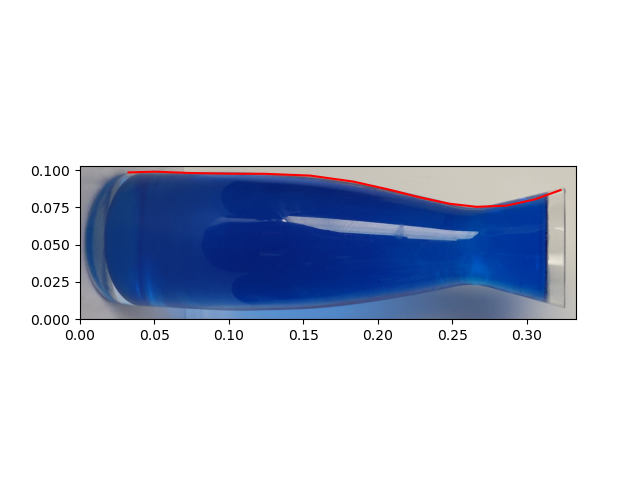

In [11]:
# Establecemos os límites dos eixos para axustar a foto á gráfica
limites = [0, 0.333, 0, 0.103]

# A continuación xeramos unha figura e un conxunto de eixos, almacenando a súa referencia en 'fig' e 'ax'
fig, ax = plt.subplots()

# Subimos a imaxe sobre a que se representará a gráfica (rotada 90 graos e con efecto espello)
img2=mpimg.imread('rotated2.png')

# Por último representamos a imaxe e a gráfica superposta
ax.plot(x_mCoords, np.polyval(coef,x_mCoords),'r')
ax.imshow(img2, extent=limites) # Establece unha imaxe como 'background'



<IPython.core.display.Javascript object>


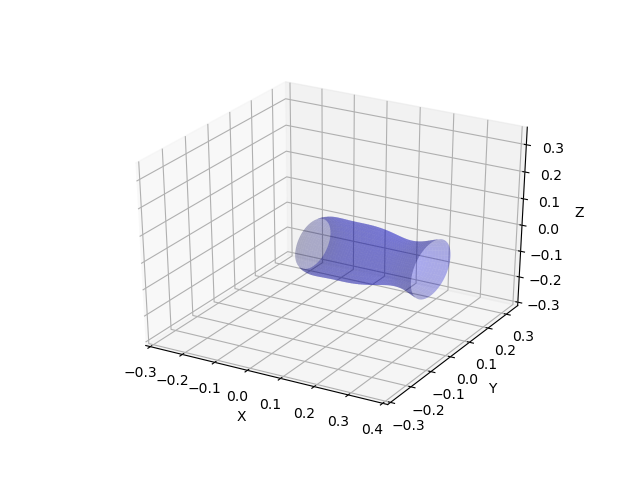

Text(0.5, 0, 'Z')

In [6]:
# Importamos a librería para ter eixos en tres dimensións
import mpl_toolkits.mplot3d.axes3d as axes3d

# Creamos unha figura e un eixo
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Xeramos un vector de 10000 números entre ó 0 e ó 0,35
u = np.linspace(0, 0.35, 10000)

# Creamos unha función que aplique o polinomio optido na tarefa anterior
def f(x):
    return -2772*x**6 + 2991*x**5 - 1201*x**4 + 225.9*x**3 - 21.04*x**2 + 0.9018*x + 0.08486

# Xeramos un vector de 60 números entre ó 0 e ó 2 pi. E convertímolos nunha matriz
v = np.linspace(0, 2*np.pi, 60)
# Combina u e v para facer duas matrices a partir das coordenadas de estos
U, V = np.meshgrid(u, v)

# Facemos xirar a función arredor do eixo X, collendo os valores da matriz creada anteriormente e multiplicandoos pola función
X = U
Y = f(X)*np.cos(V)
Z = f(X)*np.sin(V)

# Facemos a representación cos valores obtidos anteriormente
ax.plot_surface(X, Y, Z, alpha=0.3, color='blue')

# Definimos os límites para a gráfica
ax.set_xlim3d(-0.3, 0.40) 
ax.set_ylim3d(-0.3, 0.35) 
ax.set_zlim3d(-0.3, 0.35)

# Definimos os nomes dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')